# Day 1 - Practical ✍
## Advanced ML Workshop
---
## Bank Marketing Dataset

Welcome to the first practical session of SPAI's Advanced Machine Learning Workshop. In this practical, you will experience building simple Pipelines using sklearn's Pipeline utilities along with advanced data preprocessing technique. The goal of this dataset is to classify if the client will subscribe (yes/no) a term deposit (variable y).

If you have any troubles with completing any portion of the practical notebook, please do not hesitate to sound out and our team will assist you shortly.

## Data Dictionary
| Features| Descriptions|
|:---  | :--- |
|age (numeric) | age of customer|
|job | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|
|marital | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|
| education | 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')|
| default| has credit in default? (categorical: 'no','yes','unknown')|
| balance| average yearly balance, in euros (numeric) |
| housing| has housing loan? (categorical: 'no','yes','unknown')|
| loan| has personal loan? (categorical: 'no','yes','unknown')|
| contact| contact communication type (categorical: 'cellular','telephone')|
|day| last contact day of the month (numeric)|
| month| last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')|
|duration| last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|
| campaign| number of contacts performed during this campaign and for this client (numeric, includes last contact)|
| pdays| number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)|
| previous| number of contacts performed before this campaign and for this client (numeric)|
| poutcome| outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')|
|y | has the client subscribed a term deposit? (binary: 'yes','no')|



# Importing Libraries
The libraries we will be using will be as follows:
- `pandas` : Widely used for data analysis and manipulation.
- `numpy` : Provides high-performance mathematical, algebraic and transformation for multi-dimensional array and matrix data structures.
- `matplotlib.pyplot` : Data visualisation and plotting libraries
- `seaborn` : Data visualisation and plotting libraries
- `warnings` : Python built-in warning libaries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Filter out warning messages
warnings.filterwarnings('ignore') 

In [ ]:
# Matplotlib stylings
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.autolayout'] = True

# Import Data
The [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). 

Link for .csv file: 

```
https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/bank-full.csv
```

In [ ]:
bank_df = pd.read_csv("https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/bank-full.csv", delimiter=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is important as it helps us better understand our dataset, which would allow us to make informed decisions with regards to processing the dataset. For the sake of the time in this workshop, we will be showing you the EDA process and code.


The following are a few questions that we attempt to investigate from our dataset:
1. Find the number features we have and its respective datatypes.
2. Display the dimensions of the dataset.
3. Is there any missing values from the dataset.
3. Display the numerical summaries of the dataset's numerical features.
4. Plot a countplot using the `seaborn` library for our target feature, `y`.
5. Plot histograms for all of the features in the dataset except for the `y` variable.



In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank_df.shape

(45211, 17)

In [ ]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


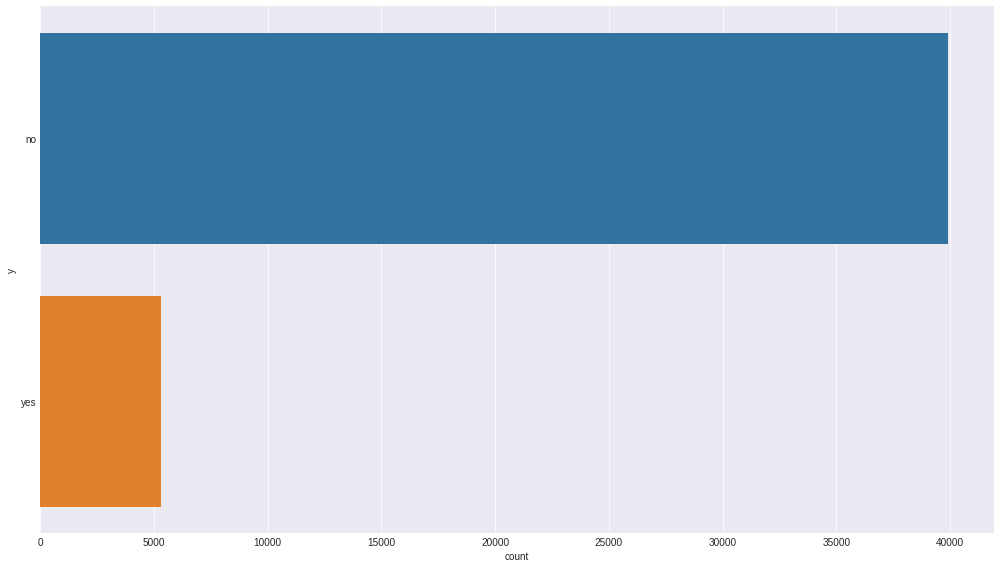

In [ ]:
sns.countplot(y=bank_df['y'])
plt.show()

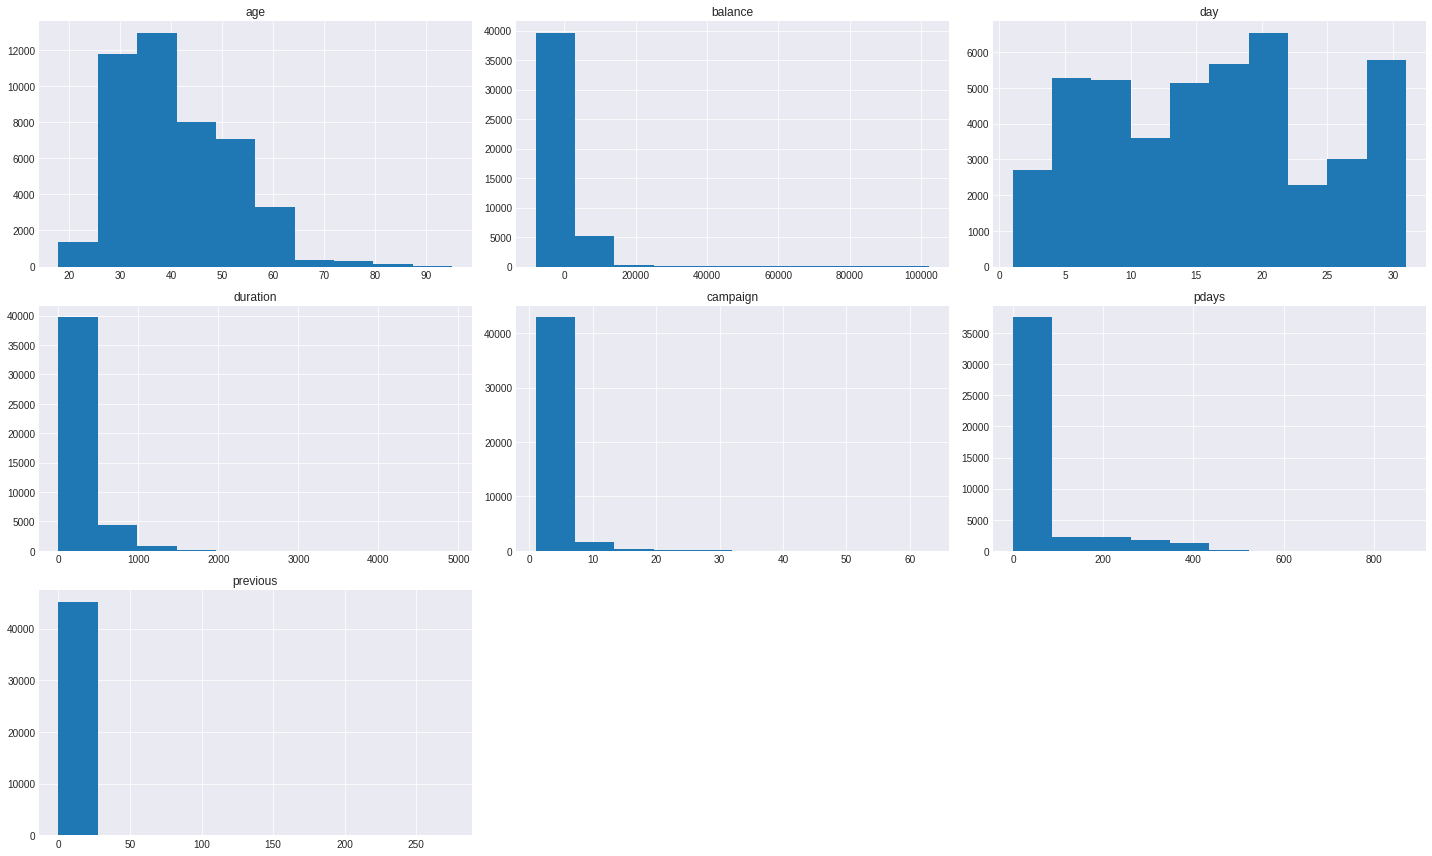

In [ ]:
bank_df.hist(figsize=(20, 12))
plt.show()

This is not the end of EDA as there are more and more interesting questions awaiting your discovery. 

The general idea is that you should understand your data and spot all the trends of features towards the target variable before actually commit into building a model. 

You can try to ask yourself the following questions and see whether could you make some changes to your dataset to get a better result:
1. Is the `day` and `month` columns redundant in the prediction? Is there any hidden relationship between the date of last contact towards the decision of the customer?
2. Is customers with higher balance more tempted to subscribe for a term deposit or is the other way around?
3. Is there any relationship between education background towards subscription for a term deposit?

# Data Preprocessing
After we have performed EDA, we have identified several errors and warnings in the dataset. Before we proceed to further preprocessing, let us first fill in the gaps.

In [ ]:
# Sklearn Functions
# Data Partition
from sklearn.model_selection import train_test_split
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, FunctionTransformer
# Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

## Missing Values
From the data dictionary, we understands that there are several columns with missing values. The missing values are padded with `'unknown'` or `-1`. Hence I will replace the missing values with `np.nan` so that it can be detected and subsequently dropped or imputed in data preprocessing.

In [ ]:
bank_df_na = bank_df.replace('unknown', np.nan).replace(-1, np.nan)

bank_df_na.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance         50
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays        36954
previous         0
poutcome     36959
y                0
dtype: int64

## Drop Columns
Based on the investigations earlier, the following are the columns that we decided to drop before building our final model along with the rationale for doing so:
1. pdays : There are 36954 missing values found in the column
2. poutcome : There are 36959 missing values found in the column
3. day : Difficult to encode and deemed unhelpful for the prediction
4. duration : Leaking the final prediction result (Refer to the data description for detailed explaination)

In [ ]:
bank_df_drop = bank_df_na.drop(columns = ['pdays', 'poutcome', 'day','duration'])
bank_df_drop

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,previous,y
0,58,management,married,tertiary,no,2143.0,yes,no,NaN,may,1,0,no
1,44,technician,single,secondary,no,29.0,yes,no,NaN,may,1,0,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,NaN,may,1,0,no
3,47,blue-collar,married,NaN,no,1506.0,yes,no,NaN,may,1,0,no
4,33,NaN,single,NaN,no,1.0,no,no,NaN,may,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,nov,3,0,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,nov,2,0,yes
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,nov,5,3,yes
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,4,0,no


#  Data Partition
Data Partitioning allows us to prevent data leakage from occuring which would in turn increase the performance of our model.

In [ ]:
X = bank_df_drop.drop(columns = 'y')
y = LabelEncoder().fit_transform(bank_df_drop.y)

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (45211, 12)
y Shape: (45211,)


In [ ]:
# Splitting into 8:2 training-testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Shape of DataFrame
print(f"Training Set\nX: {X_train.shape}\nY: {y_train.shape}\n")
print(f"Testing Set\nX: {X_test.shape}\nY: {y_test.shape}")

Training Set
X: (36168, 12)
Y: (36168,)

Testing Set
X: (9043, 12)
Y: (9043,)


# Machine Learning Pipeline
The beauty of having a Machine Learning pipeline allows us to combine multiple preprocessing modules into a single callable step. The following diagram shows the preprocessing steps involved:

![]()

# Exercise 1️⃣
# Creating a Preprocessing Pipeline
A pipeline consist of series of transformers and finally an estimator/model. For different type of features, different preprocessing technique is needed to be done. Let us start by **defining the lists of columns name for both categorical variables and numerical variables.**


## Task
1. Define a list called `categorical_variable` that contains the column name for all categorical variable.
2. Define a list called `numerical_variable` that contains the column name for all numerical variable.

In [ ]:
### Write your code here ###
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
numerical_variables = ['age', 'balance', 'campaign', 'previous']
### End ###

After we have define the list of column names, we shall proceed to build the actual pipelines that consist of series of preprocessors/transformers that we wish to apply to our dataset. Since the preprocessing approach is slightly different for Numerical features and Categorical features, we will need to build two different Pipeline.



## Task
1. Build a pipeline called `numerical_preprocessor` that consist of the following transformers:
    1. `SimpleImputer` that uses `median` strategy to impute null values
    2. `StandardScaler` that scales all numerical data
2. Build a pipeline called `categorical_preprocessor` that consist of the following transformers:
    1. `SimpleImputer` that uses `most_frequent` strategy to impute null values
    2. `OneHotEncoder` with `drop='first'` parameter to encode categorical features into dummy variables.

The following links are the documentations for the Classes involved in this task, do check them out for reference of the syntax and parameters available.
- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)
- [SimpleImputer Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer)
- [StandardScaler Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardsca%20er#sklearn.preprocessing.StandardScaler)
- [OneHotEncoder Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder)

In [ ]:
'''
Hint:
The following are the syntax to build a pipeline involving Transformer1 and Transformer2
<pipeline_name> = Pipeline(
    steps = [
        ("<transformer1_name>", Transformer1()),
        ("<transformer2_name>", Transformer2())
    ]
)

Your task is to build two different pipeline for preprocessing of numerical and categorical features as shown in diagram earlier
'''

### Write your code here ###
numerical_preprocessor = Pipeline(
    steps = [
             ('median_imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())
             ]
)

categorical_preprocessor = Pipeline(
    steps = [
             ('mode_imputer', SimpleImputer(strategy = 'most_frequent')),
             ('ohe', OneHotEncoder(drop='first'))
             ]
)
### End ###

# Exercise 2️⃣
# Column Transformer
After we have defined different preprocessors for different subset of features, it is time that we combine both preprocessors by using ColumnTransformers.


## Task
1. Define a ColumnTransformer called `preprocessor` that consist of the following preprocessing pipelines:
    - `categorical_preprocessor` that was defined in earlier step to performs preprocessing towards columns in `categorical_variables`
    - `numerical_preprocessor` that was defined in earlier step to performs preprocessing towards columns in `numerical_variables`

[ColumnTransformer Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=columntransformer#sklearn.compose.ColumnTransformer)

In [ ]:
'''
Hint:
The following are the syntax to build a ColumnTransformer involving Transformer1 and Transformer2 for different subset of columns.
<column_transformer_name> = ColumnTransformer(
    transformers = [
        ("<transformer1_name>", Transformer1(), [<list of column names>]),
        ("<transformer2_name>", Transformer2(), [<list of column names>])
    ]
)

Your task is to combine both pipelines for different subset of columns
'''
### Write your code here ###
preprocessor = ColumnTransformer(
    transformers=[
                  ('categorical_preprocessor', categorical_preprocessor, categorical_variables),
                  ('numerical_preprocessor', numerical_preprocessor, numerical_variables)
    ]
)
### End ###

# Exercise 3️⃣
# Bring it all together for a Final Pipeline
Finally, we will combine the preprocessing pipelines named `preprocessor` with our desired estimator. In this practical, we will make use of `LogisticRegression`. In practice, you should choose the model that is best suited for your use case. We will cover more about model selection in Day 3 of Advanced Machine Learning Workshop.



## Task
1. Build a pipeline called `baselinePipe` that consist of the following steps:
    1. `preprocessor` that consist of all the preprocessing modules aggregated by the ColumnTransfomer defined earlier
    2. `LogisticRegression` model which will be generating the final prediction
2. Call `.fit()` with the `baselinePipe` and parse in the `X_train` and `y_train` as the parameters.
3. Generate prediction and stored it in `y_pred` by calling `.predict()` with the baselinePipe and parse in `X_test` as the parameter.

In [ ]:
### Write your code here ###
baselinePipe = Pipeline(
    steps=[
           ('preprocessor', preprocessor),
           ('logex', LogisticRegression())
    ]
)
baselinePipe.fit(X_train, y_train)
y_pred = baselinePipe.predict(X_test)
### End ###

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy Score: 0.8793541966161672
F1 Score: 0.1278976818545164


# Exercise 4️⃣
# Creating Pipelines using SMOTE
From the model evaluation score, we realised that the current model is suffering from serious imbalanced classes as shown in the low F1 Score of 0.12.

To solve it, we will explore further on some imbalanced class techniques and integrate it into our pipeline.



## Task
1. Import `SMOTE` from `imblearn.over_sampling`
2. Build a pipeline called `SMOTEPipeline` that consist of the following steps:
    1. `preprocessor` that consist of all the preprocessing modules aggregated by the ColumnTransfomer defined earlier
    2. `SMOTE` that applies imbalanced class techniques before parsing it into the estimator
    3. `LogisticRegression` model which will be generating the final prediction
3. Call `.fit()` with the `SMOTEPipeline` and parse in the `X_train` and `y_train` as the parameters.
4. Generate prediction and stored it in `y_pred` by calling `.predict()` with the `SMOTEPipeline` and parse in `X_test` as the parameter.

In [20]:
### Write your code here ###
from imblearn.over_sampling import SMOTE
SMOTEPipeline = Pipeline(
    steps=[
           ('preprocessor', preprocessor),
           ('SMOTE', SMOTE()),
           ('Logistic Regression', LogisticRegression())
    ]
)
SMOTEPipeline.fit(X_train, y_train)
y_pred = SMOTEPipeline.predict(X_test)
### End ###

In [21]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy Score: 0.7070662390799514
F1 Score: 0.3402241594022416


From the F1 Score, we noticed that implementing SMOTE is able to reduce the problem of class imbalanced. But this is not the end! Feel free to try out different oversampling and undersampling from the imblearn libraries or even do some tweaking for the preprocessing pipelines to see can you further improve the scores!

# Conclusion
Congratulations! You have completed Practical Notebook for Day 1 of SPAI Advanced Machine Learning Workshop.  If you have any doubts or require any clarification feel free to approach us through our [Instagram](https://www.instagram.com/spai.sp/) or [Discord Server](https://discord.gg/zPYJMGfQFa)*(remember to verified yourself)*.

Do remember to fill up the Sign Out form and have a good rest. C'ya!

---
> ### Feel Free to Join the Subsequent **SPAI Machine Learning Competition** to earn **valuable Prize💰 and Experience🏆** if you have not done so!🥳🥳
[ML Comp Sign Up Link](https://docs.google.com/forms/d/e/1FAIpQLSchLDXDAY0LqM6fuRDyQwdRNbVT4FYrgDtqthEIfYpFvpWMAg/viewform) *(If it has not been closed)*